In [1]:
# Code used to create Figure 4.4a in Ch. 4 of Hourly load profile of Clinics (lineplot mean & stdev) 
# Created 7Jul23 - for thesis VF submission
# Based on Jupyter notebook: clinics_load_profile_utavg

import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np # maybe don't need this

cwd = os.getcwd()
cwd

os.chdir("/Users/po416/Library/CloudStorage/OneDrive-ImperialCollegeLondon/PhDOct2018/Projects (12Mar20)/Project Jua/Sites udata/Filled_files")
os.getcwd()

'/Users/po416/Library/CloudStorage/OneDrive-ImperialCollegeLondon/PhDOct2018/Projects (12Mar20)/Project Jua/Sites udata/Filled_files'

In [2]:
# Plot all means of Clinics (except Chilodi)
average_data = {}

filenames = {entry for entry in os.listdir(".") if entry.endswith(".csv") \
if ("Clinic" in entry) or ("clinic" in entry) or ("dispensary" in entry) \
or ("Dispensary" in entry) or ("Health" in entry) or ("health" in entry)}
for filename in filenames:
    data = pd.read_csv(filename, usecols = ["Timestamp","Consumption"])
    data["Timestamp"] = pd.to_datetime(data["Timestamp"],format="%d/%m/%Y %H:%M")
    data["Consumption"] *= 1000 # to convert to Wh
    # data['Consumption'].sum() # check totals if needed
    # Calculate average hourly utilisation
    hrly = data.groupby([data["Timestamp"].dt.hour]).Consumption.mean()
    average_data[filename.split("_gaps_filled")[0].replace("_", " ")] = hrly

# Creates df of Hour as index and sites as column, after calculating avg utilisation
results_frame = pd.DataFrame(average_data)
results_frame

,Isiolo Samburu Complex Dispensary,Dadacha Basa Dispensary,Chingombero Dispensary,Mabesheni Dispensary,Mtumwa Dispensary,Makamini Dispensary,Mgange Dawida Health centre,Mazola Dispensary,Shakahola Dispensary,Mgange Nyika health centre,Sagalla Health Centre,Saghaighu dispensary,Kavunyalo Dispensary,Boyani Dispensary,Mwembe Kati Dispensary,Werugha Health facility,Mbulia Dispensary,Busa Dispensary
Timestamp,,,,,,,,,,,,,,,,,,
0,84.037428,141.490726,62.761731,146.934530,156.422101,45.920174,105.532304,71.682197,151.647967,107.566590,224.015684,106.309431,186.659305,122.684967,108.342018,180.012798,63.290286,111.741292
1,86.933462,133.835216,62.499525,141.721255,155.352920,45.004724,106.773364,70.303629,139.703421,108.063266,216.127877,108.008262,185.709950,126.738371,107.121016,165.566061,63.462914,112.037684
2,90.732935,122.860323,62.547375,143.029229,154.830314,45.489657,102.838325,69.848442,148.923554,99.800873,192.320710,106.415668,189.261275,127.303863,105.183602,160.894931,62.717187,115.502500
3,82.965177,114.285589,63.307945,156.350062,154.790105,45.896758,96.547932,69.217680,141.871612,100.309704,159.294955,107.526804,187.483496,125.754316,106.321574,159.130804,61.778733,115.783350
4,77.109709,108.061146,63.807187,161.275707,162.434128,46.196270,102.000867,67.305628,145.252068,103.116568,188.646288,105.658081,187.990321,126.456908,100.873571,167.407464,62.464465,116.512605
5,80.095134,124.268535,63.990887,177.266101,204.217689,45.476224,97.990836,66.003771,141.781372,75.976566,178.179216,104.092270,198.522890,118.861701,104.536575,141.042505,59.704447,118.023413
6,78.171080,138.913863,45.350237,99.632673,211.675889,44.262347,38.000484,53.913505,90.170760,18.144632,103.546245,83.313337,116.322376,93.611929,102.343976,79.302912,26.052566,107.766316
7,77.616204,132.090581,42.392454,78.974437,113.549179,43.673401,40.886337,47.975001,75.290268,22.476863,60.223214,83.447231,75.525440,88.229304,98.651705,105.404856,18.613492,78.284262
8,86.190225,127.598608,75.841137,79.712760,91.056952,43.402876,47.867401,45.359625,74.759322,36.786290,70.333430,104.676813,75.645624,89.211073,104.489383,102.067136,16.728825,69.372412


In [3]:
# Calculate mean of sites
all_sites = results_frame.mean(axis=1)
# Convert to df
all_sites = pd.DataFrame(all_sites)
# Rename column name of df
all_sites.rename(columns = {0:"Mean"}, inplace = True)

# Calculate std of sites
all_sites["Std_dev"] = results_frame.std(axis=1) 
all_sites  # to show in Jupyter

,Mean,Std_dev
Timestamp,,
0,120.947307,47.733451
1,118.609051,44.936003
2,116.694487,42.549069
3,113.812033,40.117105
4,116.253832,44.311741
5,116.668341,48.756615
6,85.027507,45.919381
7,71.294679,31.019380
8,74.505550,28.050318


In [6]:
# Set style in Seaborn to plot
sns.set(rc={"figure.dpi":300})
sns.set_context("paper")  # change to notebook maybe? That is how it was in Chapter 4 first draft version 
sns.set_style("ticks")

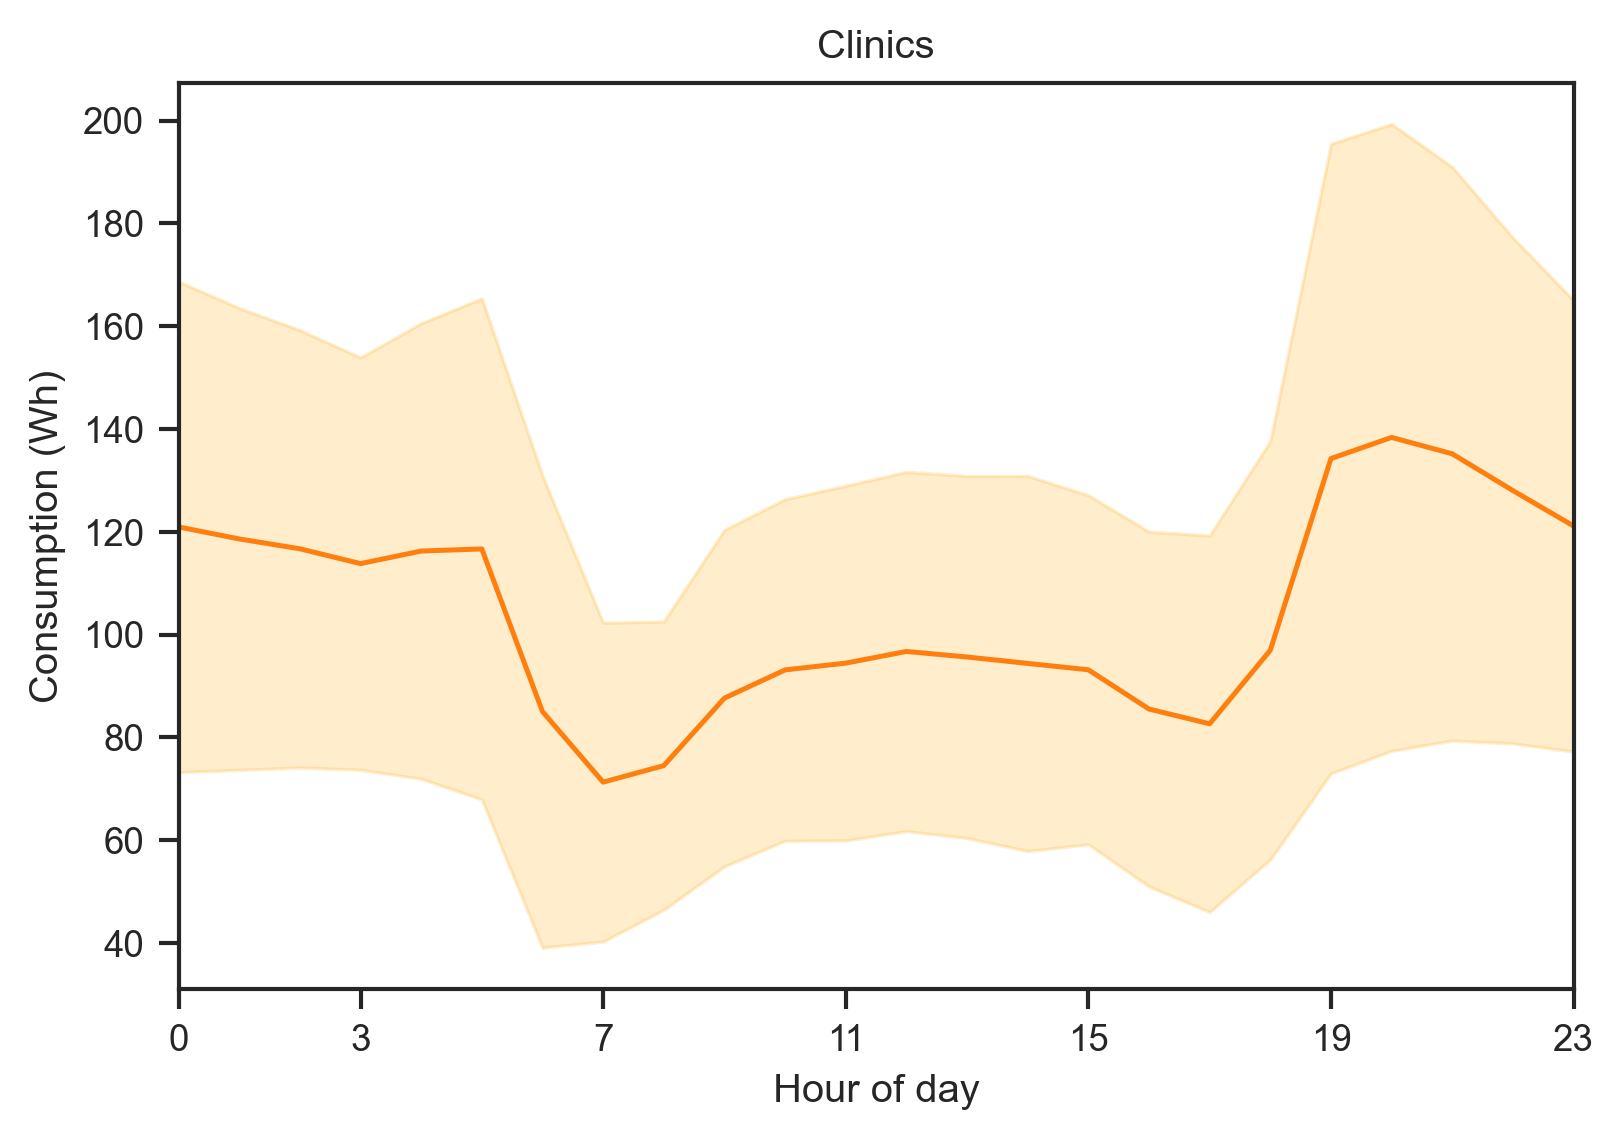

In [7]:
# Reset index to be able to plot it
all_sites = all_sites.reset_index()

# Plot average and std dev hourly utilisation, with shaded area (after resetting index)
ax = plt.gca()
all_sites.plot(kind="line",x="Timestamp",y="Mean", color="tab:orange", ax=ax)
plt.fill_between(all_sites["Timestamp"], all_sites["Mean"] - all_sites["Std_dev"], all_sites["Mean"] + all_sites["Std_dev"], color="orange",
                 alpha=0.2) # alpha is to make shaded area lighter, save fig in PNG, PDF or SVG
ax.get_legend().remove()
plt.xlabel("Hour of day")
plt.ylabel("Consumption (Wh)")
plt.xticks([0,3,7,11,15,19,23])
plt.xlim(0,23)
plt.title("Clinics")
plt.savefig("Fig_4.4a.pdf", dpi=300, bbox_inches="tight")
plt.show()

In [ ]:
# I didn't even attempted to make it a three pane figure in Seaborn. I probably could but will need to save the df
# separately. See what they say for viva. 

# I then moved figure manually to folder: "PhD thesis images submission"
# If I rerun this code in the future, change the PDF figure name to keep previous copy (adding date maybe)

# For thesis submission I copied plot above as an image directly into word (instead of using the PDF of the plot)
# the plots weren't showing when i converted from word to PDF see: "PhD-Thesis-July-2023_pruebaexport1" PDF